In [1]:
using PlotlyJS
output = true

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3439655534075777235\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5950596795094016296\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3439655534075777235\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

true

In [2]:
A = [2 1; 0 1]

2×2 Array{Int64,2}:
 2  1
 0  1

In [3]:
t = LinRange(0,2π,129)
r = [cos.(t)'; sin.(t)']

norm2(r) = sqrt(r[1]^2 + r[2]^2)
norm1(r) = abs(r[1]) + abs(r[2])
norm_inf(r) = max(abs(r[1]),abs(r[2]))

norm_inf (generic function with 1 method)

In [4]:
function plot_matrix_norm(t,r,A,f)
    for i=1:length(t)
        r[:,i] /= f(r[:,i])
    end
    Ar = A*r
    i_max = 1
    n2_max = f(Ar[:,1]) 
    for i=2:length(t)
        n2 = f(Ar[:,i])
        if n2 > n2_max
            i_max=i; n2_max=n2
        end
    end

    t1 = scatter(x=r[1,:],y=r[2,:], showlegend=false)
    t2 = scatter(x=Ar[1,:],y=Ar[2,:])
    t3 = scatter(x=[Ar[1,i_max]],y=[Ar[2,i_max]],
        mode="markers",marker_size=10)
    la = Layout(xaxis_scaleanchor="x",yaxis_scaleanchor="x",
        showlegend=false, width=400, height=300)
    return plot([t1, t2, t3],la)
end

plot_matrix_norm (generic function with 1 method)

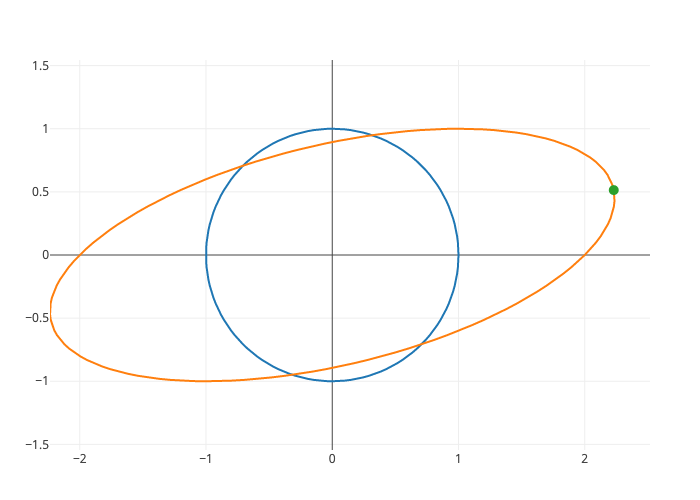

In [5]:
p = plot_matrix_norm(t,r,A,norm2)
if output
    PlotlyJS.savefig(p,"fig_la7_a.pdf")
end
display(p)

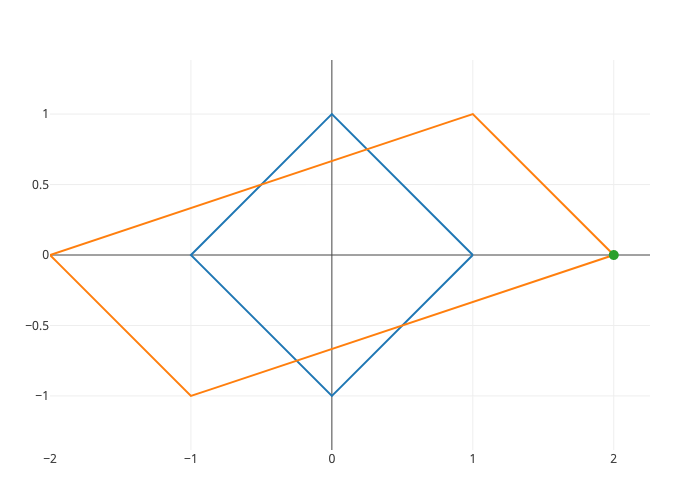

In [6]:
p = plot_matrix_norm(t,r,A,norm1)
if output
    PlotlyJS.savefig(p,"fig_la7_b.pdf")
end
display(p)

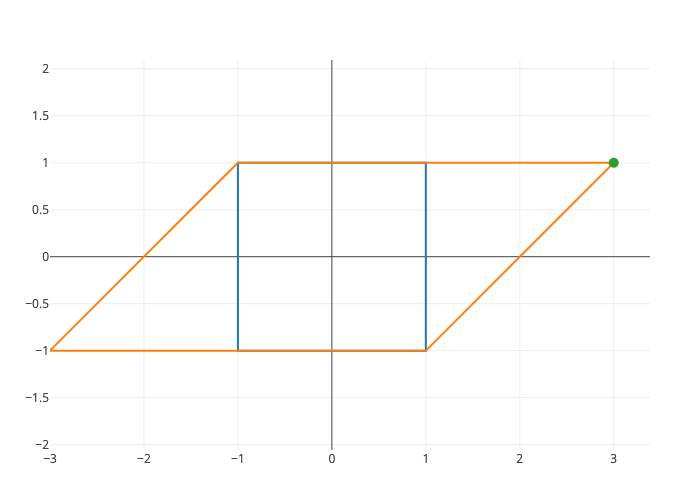

In [7]:
p = plot_matrix_norm(t,r,A,norm_inf)
if output
    PlotlyJS.savefig(p,"fig_la7_c.pdf")
end
display(p)